In [3]:
pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
PyTorch version 2.0.1+cu118
Torchvision version 0.15.2+cu118
Numpy version 1.23.5
Pandas version 1.5.3


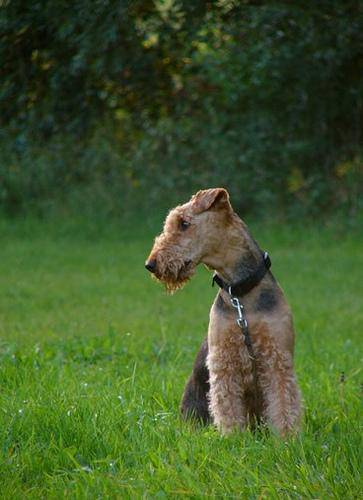

In [ ]:
#Lets view an image
from IPython.display import Image
Image('drive/MyDrive/dog_data/train/airedale/0267c5f1acbab52ae4a7927e0398612b.jpg')

## Step 1: Pytorch dataset and dataloader

In [5]:
#Define class
class dog(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    #methods
    def __len__(self):
        return len(self.data)  #Returns length of data

    def __getitem__(self, idx):
        return self.data[idx] #Return item based on index

    @property
    def classes(self):
        return self.data.classes  #Return name of folder

In [6]:
dataset = dog(
    data_dir='drive/MyDrive/dog_data/train'
)

In [ ]:
dataset2 = dog(
    data_dir='drive/MyDrive/dog_data/valid'
)

In [ ]:
len(dataset) + len(dataset2)

10222

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=500x333>, 0)

0


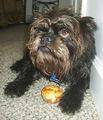

In [ ]:
image, label = dataset[40]
print(label)
image

In [ ]:
dog_breed = dataset.classes
dog_breed

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [11]:
# Get a dictionary associating target values with folder names
data_dir = 'drive/MyDrive/dog_data/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'affenpinscher', 1: 'afghan_hound', 2: 'african_hunting_dog', 3: 'airedale', 4: 'american_staffordshire_terrier', 5: 'appenzeller', 6: 'australian_terrier', 7: 'basenji', 8: 'basset', 9: 'beagle', 10: 'bedlington_terrier', 11: 'bernese_mountain_dog', 12: 'black-and-tan_coonhound', 13: 'blenheim_spaniel', 14: 'bloodhound', 15: 'bluetick', 16: 'border_collie', 17: 'border_terrier', 18: 'borzoi', 19: 'boston_bull', 20: 'bouvier_des_flandres', 21: 'boxer', 22: 'brabancon_griffon', 23: 'briard', 24: 'brittany_spaniel', 25: 'bull_mastiff', 26: 'cairn', 27: 'cardigan', 28: 'chesapeake_bay_retriever', 29: 'chihuahua', 30: 'chow', 31: 'clumber', 32: 'cocker_spaniel', 33: 'collie', 34: 'curly-coated_retriever', 35: 'dandie_dinmont', 36: 'dhole', 37: 'dingo', 38: 'doberman', 39: 'english_foxhound', 40: 'english_setter', 41: 'english_springer', 42: 'entlebucher', 43: 'eskimo_dog', 44: 'flat-coated_retriever', 45: 'french_bulldog', 46: 'german_shepherd', 47: 'german_short-haired_pointer', 48: '

In [12]:
#Using transforms function to resize images
transform = transforms.Compose([
    transforms.Resize((128, 128)), #image size
    transforms.ToTensor(), #convert into pytorch tensors
])

data_dir = 'drive/MyDrive/dog_data/train'
dataset = dog(data_dir, transform)

In [13]:
image, label = dataset[0]
image.shape

torch.Size([3, 128, 128])

In [14]:
  # iterate over dataset for verification
for images, labels in dataset:
    break

In [15]:
images, labels

(tensor([[[0.3804, 0.4510, 0.5098,  ..., 0.9098, 0.8863, 0.8588],
          [0.4196, 0.4902, 0.5412,  ..., 0.9020, 0.8784, 0.8471],
          [0.4863, 0.5176, 0.5294,  ..., 0.9059, 0.8784, 0.8471],
          ...,
          [0.1647, 0.0784, 0.0824,  ..., 0.7098, 0.7333, 0.7412],
          [0.3412, 0.1490, 0.1608,  ..., 0.7176, 0.7333, 0.7647],
          [0.5569, 0.2000, 0.1725,  ..., 0.7294, 0.7333, 0.7686]],
 
         [[0.3843, 0.4510, 0.5059,  ..., 0.9098, 0.8863, 0.8510],
          [0.4235, 0.4902, 0.5373,  ..., 0.9020, 0.8745, 0.8392],
          [0.4863, 0.5176, 0.5255,  ..., 0.9059, 0.8784, 0.8392],
          ...,
          [0.1804, 0.0941, 0.0941,  ..., 0.7059, 0.7294, 0.7294],
          [0.3529, 0.1569, 0.1608,  ..., 0.7137, 0.7294, 0.7569],
          [0.5647, 0.2039, 0.1725,  ..., 0.7176, 0.7216, 0.7608]],
 
         [[0.3176, 0.4039, 0.4863,  ..., 0.9098, 0.8863, 0.8627],
          [0.3647, 0.4471, 0.5176,  ..., 0.9020, 0.8784, 0.8510],
          [0.4431, 0.4863, 0.5098,  ...,

# Dataloaders: Batching our dataset

In [16]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True) #32 images at a time, shuffle image at random (typically we only use shuffle during training)


In [17]:
#verify batched dataset
for images, labels in dataloader:
    break

images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [18]:
labels

tensor([109,   8,  22,  34, 104,  26,  79,  86,  99,   4,  92, 104,  21,  26,
          5,  70,  37,  23,  16, 117,  69, 104,  57,   9,  97,  12,  82,  95,
         21,  14,  88,  67])

# Step 2: Creating the pytorch model

In [19]:
class DogClassifier(nn.Module):
    def __init__(self, num_classes=120):
        super(DogClassifier, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )

    def forward(self, x):
        # Connect these parts and return the output
        x = self.features(x)
        output = self.classifier(x)
        return output

In [ ]:
#verify model
model = DogClassifier(num_classes=120)
print(str(model)[:500])

DogClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
  


In [ ]:
example_out = model(images)
example_out.shape # [batch_size, num_classes]

torch.Size([32, 120])

# Pytorch training

In [24]:
# Loss function
criterion = nn.CrossEntropyLoss() #for multi-class classification
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
#Test out loss function
criterion(example_out, labels)
print(example_out.shape, labels.shape)

NameError: ignored

# Setup datasets

In [20]:
#Setup our transform (resize image and convert into tensors)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
#data path/directory
train_folder = 'drive/MyDrive/dog_data/train'
valid_folder = 'drive/MyDrive/playing_card_data/valid'

train_dataset = dog(train_folder, transform=transform)
val_dataset = dog(valid_folder, transform=transform)

#Turn into batches of 32, shuffle only for training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# Creating training loop

In [ ]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #check for gpu(cuda)

model = DogClassifier(num_classes=120)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'): #progress bar
        # Move inputs and labels to the gpu device
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad() #reset gradient
        outputs = model(images) #forward pass/function
        loss = criterion(outputs, labels) #compute loss
        loss.backward() #computes the gradients.
        optimizer.step() #dates the model's parameters based on these gradients to improve its performance.
        running_loss += loss.item() * labels.size(0) #track the running loss during training
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad(): #disable gradient computation during validation phase
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

Training loop:   0%|          | 0/257 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 2.8870898243749017, Validation loss: 5.179406252447165


Training loop:   0%|          | 0/257 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 1.5531165692046702, Validation loss: 5.711533751577702


Training loop:   0%|          | 0/257 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.969669340605458, Validation loss: 6.116164997388732


Training loop:   0%|          | 0/257 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.6689102042621831, Validation loss: 6.764847906580511


Training loop:   0%|          | 0/257 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.4686366093374781, Validation loss: 6.995002982301532


# Save 1st model

In [ ]:
import os
# Save the model's state dictionary after training in a specific directory
directory_path = 'drive/MyDrive/dog_data/models'
file_name = 'efficientnet_b0.pth'
torch.save(model.state_dict(), os.path.join(directory_path, file_name))

# Visualize loss



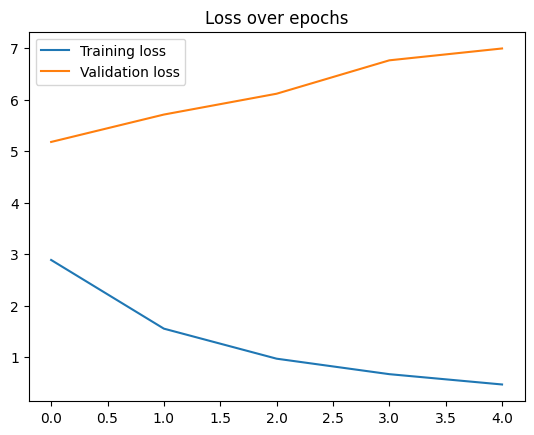

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

# Evaluating result

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))

    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")

    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

def visualize_top5_predictions(original_image, probabilities, class_names):
    # Get the indices of the top 5 predicted classes
    top5_indices = np.argsort(probabilities)[-5:][::-1]
    top5_classes = [class_names[i] for i in top5_indices]
    top5_probs = probabilities[top5_indices]

    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))

    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")

    # Display the top 5 predictions
    axarr[1].barh(top5_classes, top5_probs)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Top 5 Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()


# Load back model

In [21]:
# Create an instance of the model class
model = DogClassifier(num_classes=120)

# Load the saved model's state dictionary onto the CPU
model.load_state_dict(torch.load('drive/MyDrive/dog_data/models/efficientnet_b0.pth', map_location=torch.device('cpu')))

# Move the model to the CPU for inference
model.to(torch.device('cpu'))


DogClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kernel_si

# Example

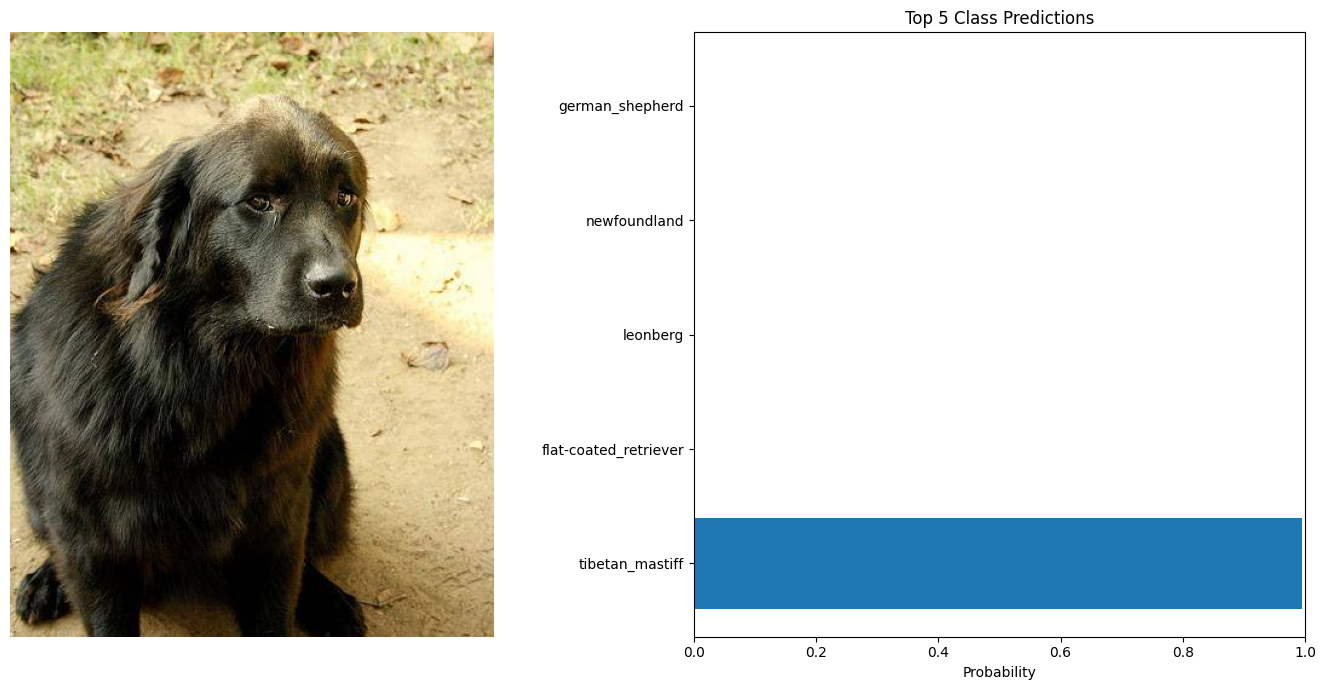

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #check for gpu(cuda)
# Example usage
test_image = "drive/MyDrive/dog_data/test/0d2eabeabab223d84cc00ffa8aacd16d.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes
visualize_top5_predictions(original_image, probabilities, class_names)

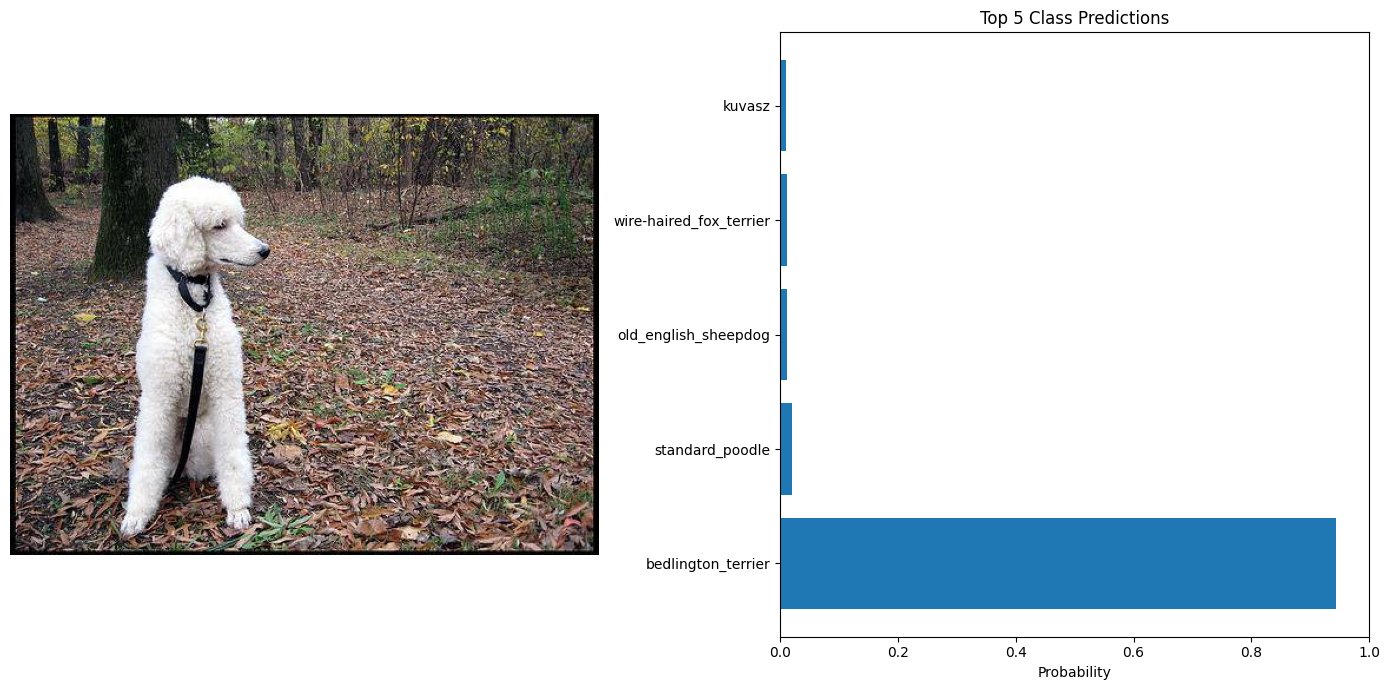

In [ ]:
from glob import glob
test_images = glob('drive/MyDrive/dog_data/test/*') # * is used as a wildcard to match any sequence (ace of diamonds/3.jpg)
test_examples = np.random.choice(test_images, 1)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes
    visualize_top5_predictions(original_image, probabilities, class_names)

# Model accuracy on val dataset

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #check for gpu(cuda)

# Test phase
model.eval()
running_loss = 0.0
correct_predictions = 0
total_data_points = 0

with torch.no_grad():  # Disable gradient computation during testing
    for images, labels in tqdm(val_loader, desc='Val loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)

        # Forward pass to get predictions
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * labels.size(0)

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # _ used as a placeholder since we dont want to display the max values
        correct_predictions += (predicted == labels).sum().item()
        total_data_points += labels.size(0)

val_loss = running_loss / len(val_loader.dataset)
val_accuracy = (correct_predictions / total_data_points) * 100

print(f"val loss: {val_loss}, Val accuracy: {val_accuracy:.2f}%")

Val loop:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 6.99500329539461, Val accuracy: 0.75%
